# Lending Club

LendingClub is the world's largest peer-to-peer lending platform located in San Francisco, California, United States.

The goal of this project is to build a model that predict wether or not the borrower will pay back the loan. The model can help detect borrowers if they will not be able to pay the loan based on their historical information.

## Data Overview

1. loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
1. term: The number of payments on the loan. Values are in months and can be either 36 or 60.
1. int_rate: Interest Rate on the loan
1. installment: The monthly payment owed by the borrower if the loan originates.
1. grade: LC assigned loan grade
1. sub_grade: LC assigned loan subgrade
1. emp_title: The job title supplied by the Borrower when applying for the loan.*
1. emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
1. home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
1. annual_inc: The self-reported annual income provided by the borrower during registration.
1. verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
1. issue_d: The month which the loan was funded
1. loan_status: Current status of the loan
1. purpose: A category provided by the borrower for the loan request.
1. title: The loan title provided by the borrower
1. zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.
1. addr_state: The state provided by the borrower in the loan application
1. dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
1. earliest_cr_line: The month the borrower's earliest reported credit line was opened
1. open_acc: The number of open credit lines in the borrower's credit file.
1. pub_rec: Number of derogatory public records
1. revol_bal: Total credit revolving balance
1. revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
1. total_acc: The total number of credit lines currently in the borrower's credit file
1. initial_list_status: The initial listing status of the loan. Possible values are – W, F
1. application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
1. mort_acc: Number of mortgage accounts.
1. pub_rec_bankruptcies: Number of public record bankruptcies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('lending_club_loan_two.csv')

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [9]:
df.describe(include=object).transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [13]:
dataFeaturesvalues = df.columns
dataTypevalues = []
nullvalues=[]
nullPctvalues=[]
uniquevalues=[]
uniqueSamplevalues=[]

for i in dataFeaturesvalues:
    dataTypevalues.append(df[i].dtype)
    nullvalues.append(sum(df[i].isna()))
    nullPctvalues.append(round(sum(df[i].isna())/len(df)*100,2))
    uniquevalues.append(df[i].nunique())
    uniqueSamplevalues.append(df[i].sample(2).values)
    
df1 = pd.DataFrame({'dataFeatures': dataFeaturesvalues,
                    'dataType': dataTypevalues,
                    'null': nullvalues,
                    'nullPct': nullPctvalues,
                    'unique': uniquevalues,
                    'uniqueSample': uniqueSamplevalues
                   })
df1    

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,loan_amnt,float64,0,0.00,1397,"[10000.0, 20000.0]"
1,term,object,0,0.00,2,"[ 36 months, 60 months]"
2,int_rate,float64,0,0.00,566,"[14.65, 12.29]"
3,installment,float64,0,0.00,55706,"[322.63, 304.68]"
4,grade,object,0,0.00,7,"[E, B]"
5,sub_grade,object,0,0.00,35,"[C2, A5]"
6,emp_title,object,22927,5.79,173105,"[Sales, Warehouse Foreperson]"
7,emp_length,object,18301,4.62,11,"[10+ years, 1 year]"
8,home_ownership,object,0,0.00,6,"[MORTGAGE, RENT]"
9,annual_inc,float64,0,0.00,27197,"[52000.0, 985000.0]"


## Exploratory

### Plotting Loan Status as the target of model

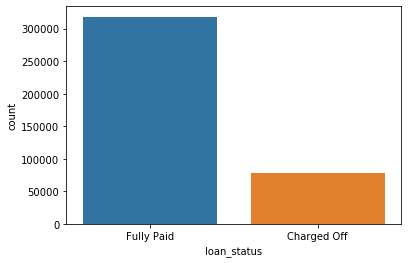

In [476]:
sns.countplot(x=df['loan_status'])

In [477]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

([<matplotlib.patches.Wedge at 0x293e6c05848>,
 [Text(-0.8977154577415746, 0.6356940749541681, 'Fully Paid'),
  Text(0.8977154577415741, -0.6356940749541686, 'Charged Off')])

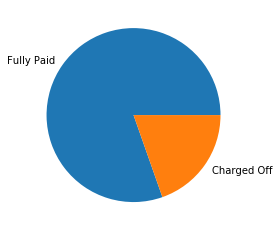

In [18]:
plt.pie(x=df['loan_status'].value_counts(normalize=True).values, labels=df['loan_status'].value_counts(normalize=True).index)

It is shown that 80% of borrower can fully pay back the loan, while the 20% other can't. In this project we will focus on borrowers that cannot fully pay back.

### Plotting Loan Amount

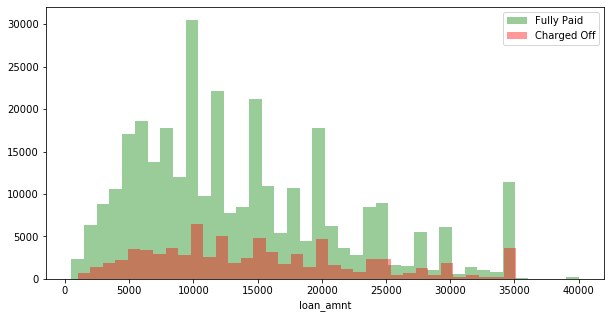

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['loan_status']=="Fully Paid"]['loan_amnt'],bins=40, label="Fully Paid", kde=False, color='green')
sns.distplot(df[df['loan_status']=="Charged Off"]['loan_amnt'],bins=40, label="Charged Off", kde=False, color='red')
plt.legend()

### Plotting Term

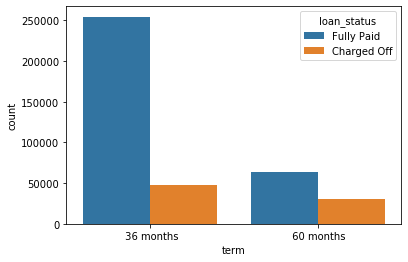

In [40]:
sns.countplot(data=df, x='term', hue='loan_status')

### Plotting Interest Rate

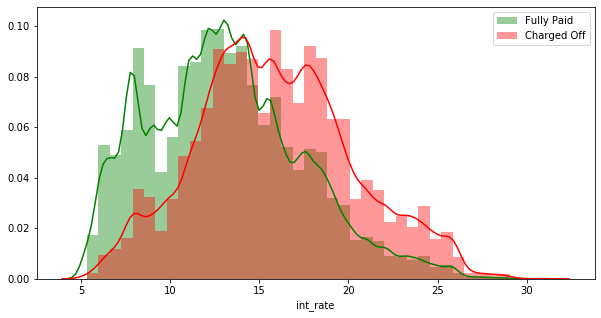

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['loan_status']=="Fully Paid"]['int_rate'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[df['loan_status']=="Charged Off"]['int_rate'],bins=40, label="Charged Off",  color='red')
plt.legend()

### Plotting Installment

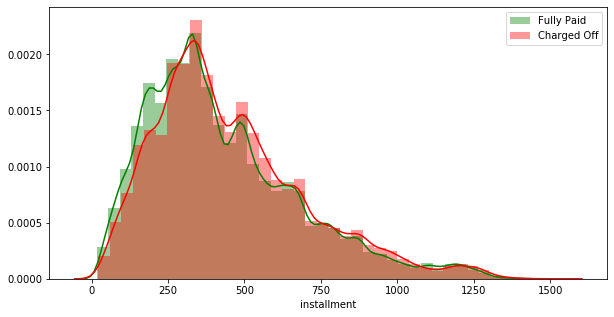

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['loan_status']=="Fully Paid"]['installment'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[df['loan_status']=="Charged Off"]['installment'],bins=40, label="Charged Off", color='red')
plt.legend()

### Plotting Home Ownership

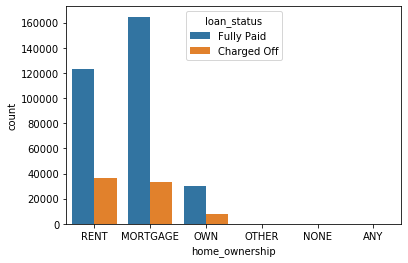

In [48]:
sns.countplot(data=df, x='home_ownership', hue='loan_status')

### Plotting Annual Income

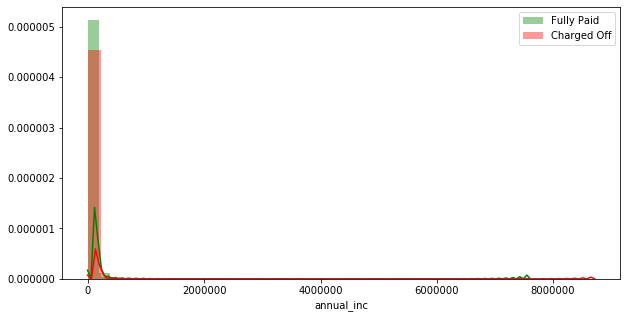

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['loan_status']=="Fully Paid"]['annual_inc'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[df['loan_status']=="Charged Off"]['annual_inc'],bins=40, label="Charged Off", color='red')
plt.legend()

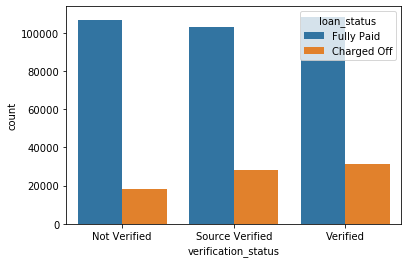

In [51]:
sns.countplot(data=df, x='verification_status', hue='loan_status')

### Plotting Credit Purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

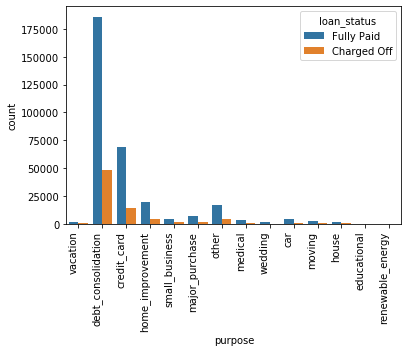

In [53]:
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
)

### Plotting Debt to Income Ratio

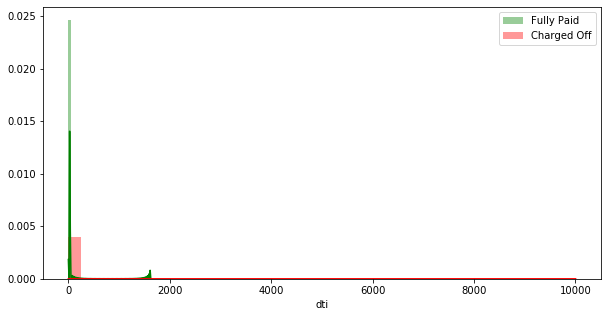

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['loan_status']=="Fully Paid"]['dti'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[df['loan_status']=="Charged Off"]['dti'],bins=40, label="Charged Off", color='red')
plt.legend()

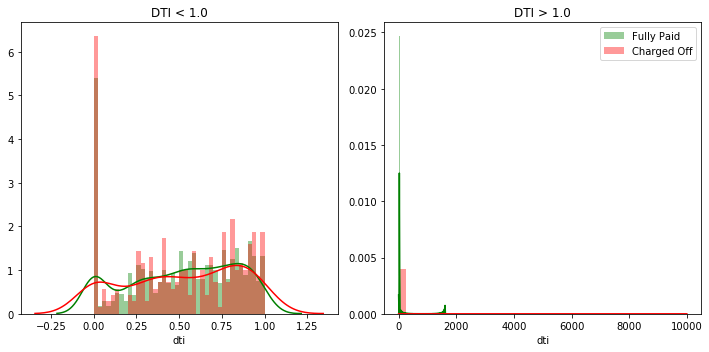

In [86]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df[(df['loan_status']=="Fully Paid") & (df['dti']<=1)]['dti'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[(df['loan_status']=="Charged Off") & (df['dti']<=1)]['dti'],bins=40, label="Charged Off", color='red')

plt.title('DTI < 1.0')

plt.subplot(1,2,2)
sns.distplot(df[(df['loan_status']=="Fully Paid") & (df['dti']>1)]['dti'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[(df['loan_status']=="Charged Off") & (df['dti']>1)]['dti'],bins=40, label="Charged Off", color='red')

plt.title('DTI > 1.0')

plt.legend()
plt.tight_layout()
plt.show()



### Plotting total number of credit lines 

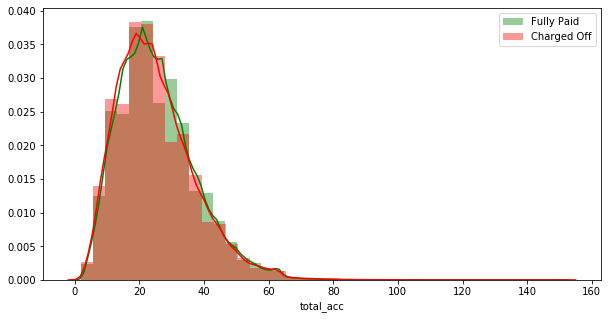

In [60]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['loan_status']=="Fully Paid"]['total_acc'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[df['loan_status']=="Charged Off"]['total_acc'],bins=40, label="Charged Off", color='red')
plt.legend()

### Plotting Initial List Status

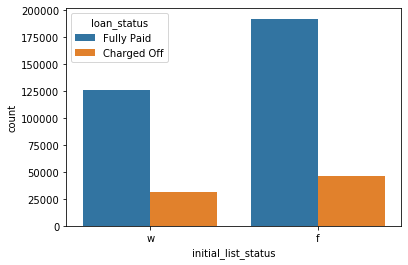

In [61]:
sns.countplot(data=df, x='initial_list_status', hue='loan_status')

### Plotting Application Type

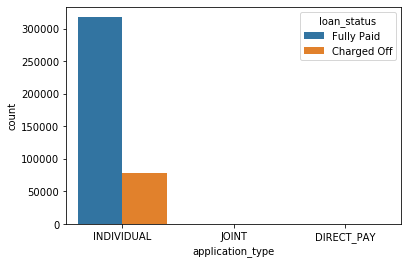

In [62]:
sns.countplot(data=df, x='application_type', hue='loan_status')

### Plotting Public Record Derogatory

In [91]:
df['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

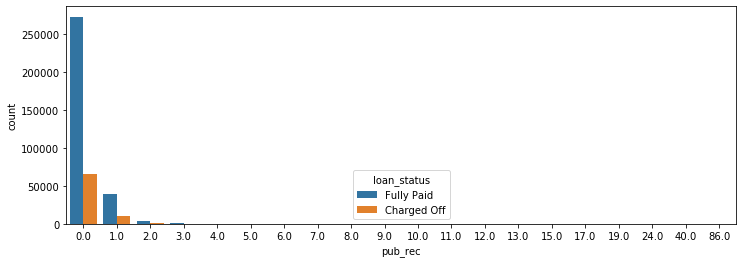

In [92]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='pub_rec', hue='loan_status')

### Plotting Number of mortgage accounts

C:\Users\62857\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\62857\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\62857\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\62857\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\62857\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\62857\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning

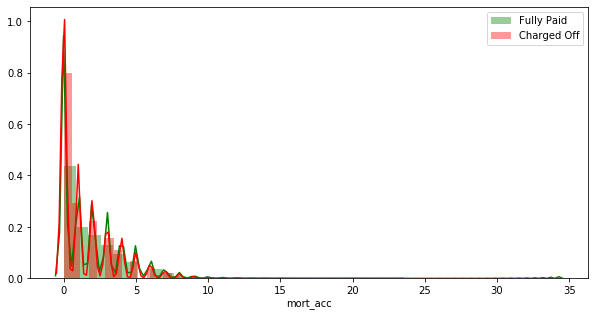

In [63]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['loan_status']=="Fully Paid"]['mort_acc'],bins=40, label="Fully Paid", color='green')
sns.distplot(df[df['loan_status']=="Charged Off"]['mort_acc'],bins=40, label="Charged Off", color='red')
plt.legend()

### Correlation

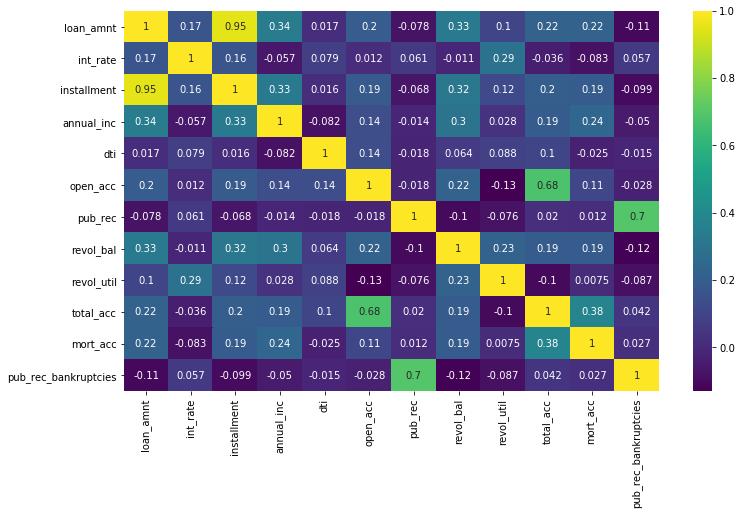

In [37]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

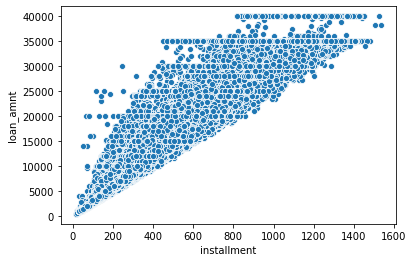

In [38]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

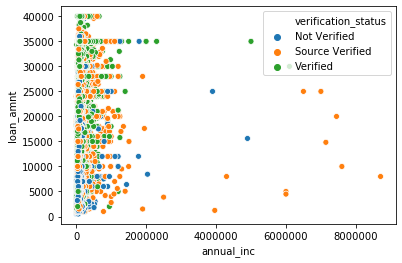

In [75]:
sns.scatterplot(x='annual_inc',y='loan_amnt',data=df, hue='verification_status')

In [81]:
df['annual_inc'].max()

8706582.0

In [82]:
df[df['annual_inc']== 8706582.0]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
308700,8000.0,36 months,13.66,272.11,C,C3,Correctional Sgt.,10+ years,MORTGAGE,8706582.0,Source Verified,Jan-2015,Charged Off,credit_card,Credit card refinancing,0.11,Jul-2000,11.0,0.0,16449.0,54.1,18.0,w,INDIVIDUAL,1.0,0.0,"2410 Luna Station\r\nSouth Brandi, HI 93700"


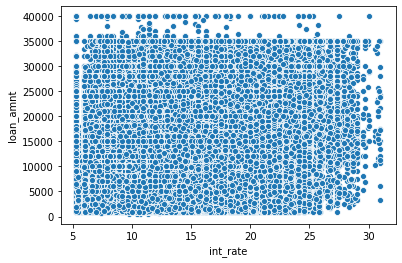

In [79]:
sns.scatterplot(x='int_rate',y='loan_amnt',data=df)

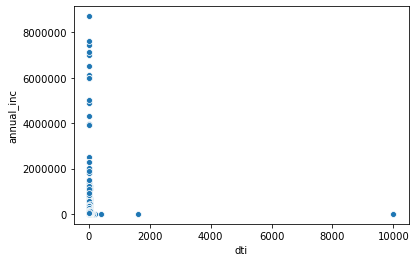

In [80]:
sns.scatterplot(x='dti',y='annual_inc',data=df)

In [480]:
df['loan_status'] = df['loan_status'].map({'Charged Off':1, 'Fully Paid': 0})

Text(0, 0.5, 'Parameter(s)')

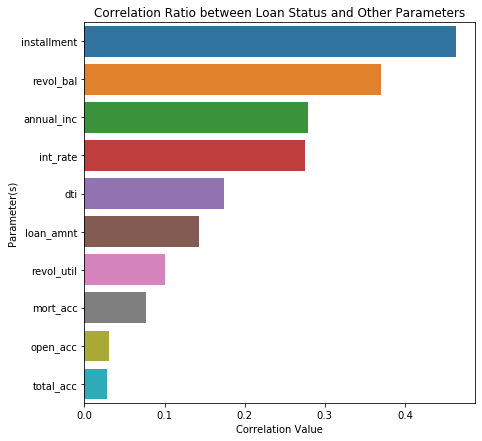

In [481]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta


lis = []
for i in df.drop('loan_status',axis=1).describe(exclude=object).columns:
    lis.append([i,correlation_ratio(df[i], df['loan_status'])])
lis = pd.DataFrame(lis).sort_values(1, ascending=False)

plt.figure(figsize=(7,7))
sns.barplot(y=lis[0].head(10), x=lis[1].head(10))
plt.title('Correlation Ratio between Loan Status and Other Parameters')
plt.xlabel('Correlation Value')
plt.ylabel('Parameter(s)')

### Grade

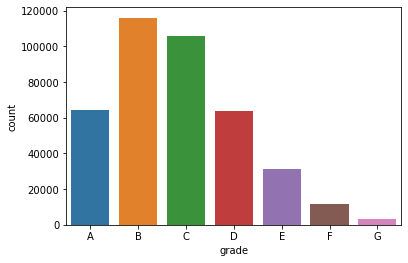

In [31]:
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df, order=grade_order)

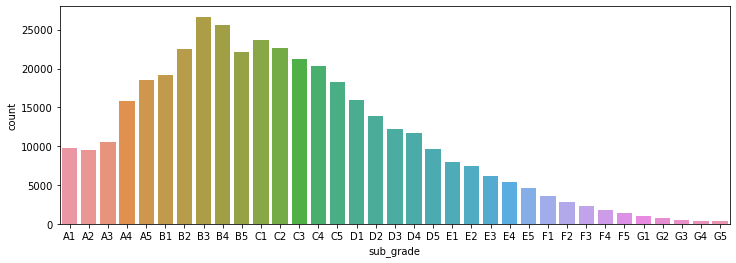

In [486]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order)

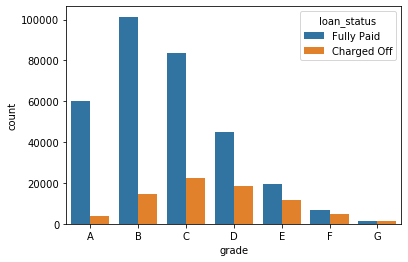

In [35]:
sns.countplot(x='grade',data=df, hue='loan_status', order=grade_order)

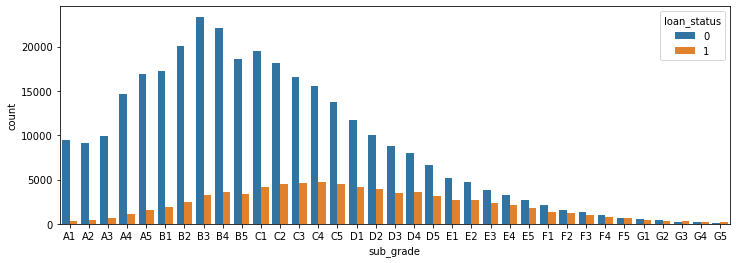

In [487]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,hue='loan_status')

Based on the graph, we see that subgrade F and G don't pay back the loan. We will analyze further about these subgrades.

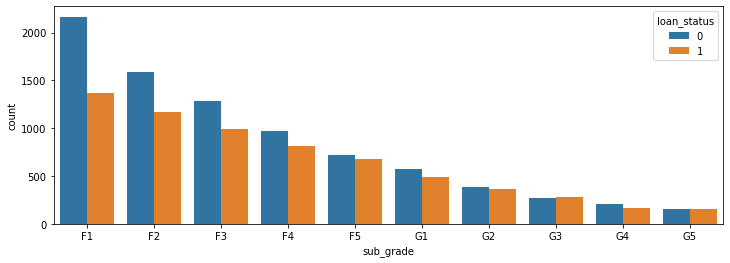

In [488]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

## Data Preprocessing

### Missing Value

In [489]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Mortage account has most missing data among all features. We also have missing data in columns of Employment title, Employment length, title, revol_util, and pub_rec_bankruptcies.

We will examine emp_title and emp_length to see whether it will be okay to drop them. 

'emp_title' is the job title supplied by the Borrower when applying for the loan.


'emp_length' is employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [490]:
df['emp_title'].value_counts()

Teacher                        4389
Manager                        4250
Registered Nurse               1856
RN                             1846
Supervisor                     1830
                               ... 
Total women healthcare            1
The Matworks Company LLC          1
Town Of Harrison                  1
Foundation For Medical Care       1
Romeos Pizza                      1
Name: emp_title, Length: 173105, dtype: int64

As there are to many job titles, we removed the column out of our dataset.

In [491]:
df['emp_title'].nunique()

173105

In [492]:
df=df.drop('emp_title', axis=1)

In [493]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [494]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

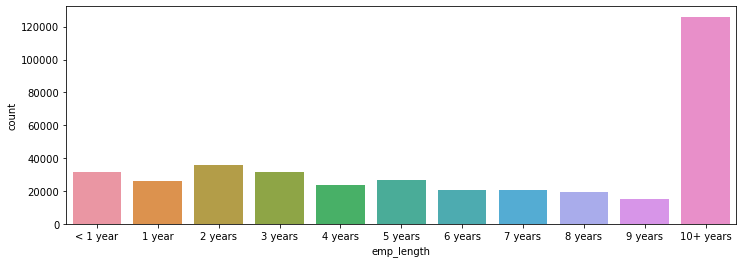

In [495]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

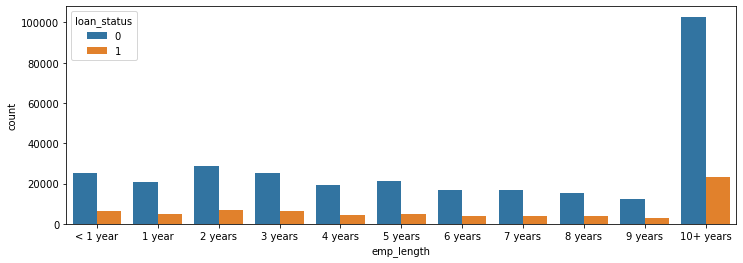

In [496]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

Based on the graph we see that it is likely that most people who paid the loan were employed in 10 years, and it is true as these are people who are able to pay.

In [89]:
emp_co = df[df['loan_status']==1].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']==0].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp

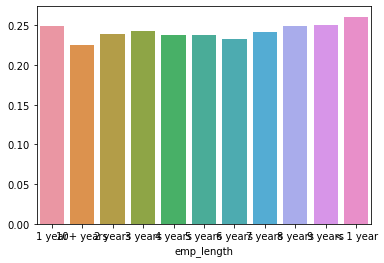

In [509]:
sns.barplot(x=emp_len.index, y=emp_len.values)

The plot showed that chargeoff rates are extremely similar across all employment lengths. Therefore we drop it from the dataset.

In [441]:
df=df.drop('emp_length',axis=1)

In [442]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Now we will review the title and the purpose column to see if there is any repeated information.

In [443]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [444]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

It showed that title and purpose columns are repeated information, so we drop title from the dataset.

In [445]:
df=df.drop('title',axis=1)

Mortgage Accounts

In [446]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [447]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
loan_status            -0.073111
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

We will handle the missing data by first checking other features which correlate with it.

In [448]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Total_acc feature correlates with the mort_acc. Now we try to do fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [449]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [450]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [451]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

revol_util and the pub_rec_bankruptcies still have missing data, but they are less than 0.5% of the total data. So we drop the missing values by the rows.

In [452]:
df=df.dropna()

In [453]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Our dataset now does not have any missing data.

### Creating Dummy Variables

In [455]:
print('The categorical variables are:')
df.select_dtypes(['object']).columns

The categorical variables are:


Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Converting term feature into either 30 or 60 integer numeric data type.

In [456]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [457]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

As we already know that the grade is part of sub_grade, we drop the feature off.

In [458]:
df = df.drop('grade',axis=1)

Converting the subgrade into dummy variables, then concatenate these new columns to the original dataframe.

In [459]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [460]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [461]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [462]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

Home Ownership

In [463]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Converting home_ownership intoto dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.

In [289]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

Feature engineering for a zip code column from the address in the data set. We create a column called 'zip_code' that extracts the zip code from the address column.

In [290]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [291]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

Dropping issue date

In [292]:
df=df.drop('issue_d',axis=1)

Extract the year from earliest_cr_year feature

In [293]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [294]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [295]:
df['loan_status'] = df['loan_status'].map({'Charged Off':1, 'Fully Paid': 0})

In [314]:
df = df.reset_index(drop=True)

## Modelling, Prediction and Evaluation

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [58]:
y_train.value_counts(normalize=True)

0    0.804333
1    0.195667
Name: loan_status, dtype: float64

### Handling oversampled data with SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, recall_score, precision_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Fitting with SMOTE

In [61]:
def score_algorithm_smote(model):
    clf = model()
    # Fitting
    clf.fit(X_sm, y_sm)
    # Evaluating Train Data
    prediction_train = clf.predict(X_sm)
    recall_train = recall_score(y_sm, prediction_train)
    precision_train = precision_score(y_sm, prediction_train)
    accuracy_train = accuracy_score(y_sm, prediction_train)
    # Evaluating Test Data
    prediction_test = clf.predict(X_test)
    recall_test = recall_score(y_test, prediction_test)
    precision_test = precision_score(y_test, prediction_test)
    accuracy_test = accuracy_score(y_test, prediction_test)
    all_score = [recall_train, precision_train, accuracy_train,  recall_test, precision_test, accuracy_test]
    return all_score

In [62]:
algorithm = [LogisticRegression, GradientBoostingClassifier, GaussianNB, XGBClassifier, DecisionTreeClassifier, RandomForestClassifier]
all_score_smote=[]
for item in algorithm:
    score = score_algorithm_smote(item)
    all_score_smote.append(score)

In [63]:
df_score_smote = pd.DataFrame(all_score_smote, index =['LogisticRegression', 'GradientBoostingClassifier', 'GaussianNB', 'XGBClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'], columns=['recall_train','precision_train','accuracy_train', 'recall_test','precision_test', 'accuracy_test'])
df_score_smote

,recall_train,precision_train,accuracy_train,recall_test,precision_test,accuracy_test
LogisticRegression,0.593543,0.623913,0.617882,0.579193,0.285341,0.629282
GradientBoostingClassifier,0.864555,0.911097,0.890097,0.510410,0.606373,0.837382
GaussianNB,0.598168,0.660558,0.645393,0.558245,0.308684,0.664832
XGBClassifier,0.875011,0.982945,0.929914,0.486397,0.866834,0.883457
DecisionTreeClassifier,1.000000,1.000000,1.000000,0.594457,0.541667,0.820024
RandomForestClassifier,0.999988,1.000000,0.999994,0.476562,0.865862,0.881686


#### Fitting with original data

In [64]:
def score_algorithm(model):
    clf = model()
    # Fitting
    clf.fit(X_train, y_train)
    # Evaluating Train Data
    prediction_train = clf.predict(X_train)
    recall_train = recall_score(y_train, prediction_train)
    precision_train = precision_score(y_train, prediction_train)
    accuracy_train = accuracy_score(y_train, prediction_train)
    # Evaluating Test Data
    prediction_test = clf.predict(X_test)
    recall_test = recall_score(y_test, prediction_test)
    precision_test = precision_score(y_test, prediction_test)
    accuracy_test = accuracy_score(y_test, prediction_test)
    all_score = [recall_train, precision_train, accuracy_train,  recall_test, precision_test, accuracy_test]
    return all_score

In [65]:
algorithm = [LogisticRegression, GradientBoostingClassifier, GaussianNB, XGBClassifier, DecisionTreeClassifier, RandomForestClassifier]
all_score=[]
for item in algorithm:
    score = score_algorithm(item)
    all_score.append(score)

In [66]:
df_score_original = pd.DataFrame(all_score, index =['LogisticRegression', 'GradientBoostingClassifier', 'GaussianNB', 'XGBClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'], columns=['recall_train','precision_train','accuracy_train', 'recall_test','precision_test', 'accuracy_test'])
df_score_original

,recall_train,precision_train,accuracy_train,recall_test,precision_test,accuracy_test
LogisticRegression,0.021757,0.525371,0.804744,0.022289,0.526395,0.802351
GradientBoostingClassifier,0.434737,0.993976,0.888881,0.434091,0.993133,0.887303
GaussianNB,0.089679,0.480097,0.802878,0.092924,0.497776,0.801743
XGBClassifier,0.498149,0.943543,0.895972,0.477647,0.916207,0.887873
DecisionTreeClassifier,1.000000,1.000000,1.000000,0.596564,0.566053,0.829487
RandomForestClassifier,0.999968,1.000000,0.999994,0.453123,0.962687,0.888189


Best model: XGBoost

#### GridSearchCV for XGBoost

##### Step 1: Tuning max_depth and min_child_weight

In [148]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()
gsearch1 = GridSearchCV(estimator=xgb,
                     param_grid= {
                         'max_depth':range(3,10,2),
                         'min_child_weight':range(1,6,2)
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch1.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [72]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 3}, 0.8627383901537493)

Based on the result, the best parameter for the model is {'max_depth': 9, 'min_child_weight': 3}. The recall score is raised to 0.8627.

Next, we will try with more specific parameters.

In [76]:
gsearch2 = GridSearchCV(estimator=xgb,
                     param_grid= {
                         'max_depth':[8,9,10],
                         'min_child_weight':[2,3,4]
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch2.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

In [77]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 10, 'min_child_weight': 4}, 0.8635248318980772)

Best max_depth is 10 and best min_child_weight is 4

##### Step 2: Tuning Gamma

In [79]:
gsearch3 = GridSearchCV(estimator=XGBClassifier(max_depth=10, min_child_weight=4),
                     param_grid= {
                        'gamma':[i/10.0 for i in range(0,5)]
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch3.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

In [80]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.1}, 0.8635444929416852)

The best parameter for gamma is 0.1

##### Step 3: Tuning sub_sample and colsample_bytree

In [81]:
gsearch4 = GridSearchCV(estimator=XGBClassifier(max_depth=10, min_child_weight=4, gamma=0.1),
                     param_grid= {
                         'subsample':[i/10.0 for i in range(6,10)],
                         'colsample_bytree':[i/10.0 for i in range(6,10)]
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch4.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [82]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7}, 0.8639731036923439)

The best parameter for colsample_bytree is 0.9 and subsample is 0.7.

##### Step 4: Tuning Regularization Parameters

In [83]:
gsearch5 = GridSearchCV(estimator=XGBClassifier(max_depth=10, min_child_weight=4, gamma=0.1, colsample_bytree=0.9, subsample=0.7),
                     param_grid= {
                         'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch5.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

In [84]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 1e-05}, 0.8639455782312926)

In [94]:
pred = gsearch5.predict(X_test)

In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     63386
           1       0.83      0.51      0.63     15658

    accuracy                           0.88     79044
   macro avg       0.86      0.74      0.78     79044
weighted avg       0.88      0.88      0.87     79044



The best parameter for reg_alpha is 0.0001

##### Step 5: Reducing Learning Rate and Increasing n_estimators

In [122]:
xgb_final = XGBClassifier(max_depth=10, min_child_weight=4, gamma=0.1, colsample_bytree=0.9, subsample=0.7, reg_alpha=0.0001,
                         learning_rate=0.01, n_estimators=5000)

In [97]:
xgb_final.fit(X_sm,y_sm)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.0001,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
              validate_parameters=False, verbosity=None)

In [93]:
pred_xgb = xgb_final.predict(X_test)
print(classification_report(y_test,pred_xgb)) 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     63386
           1       0.88      0.49      0.63     15658

    accuracy                           0.89     79044
   macro avg       0.89      0.74      0.78     79044
weighted avg       0.89      0.89      0.87     79044



The recall score is still low. Therefore, we will try tuning Decision Tree Classifier hyperparameters.

#### GridSearchCV for Decision Tree

##### Step 1: Tuning Max Depth

In [120]:
gsearch6 = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid= {
                         'max_depth': np.linspace(1, 32, 32, endpoint=True)
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch6.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., 

In [124]:
gsearch6.best_params_, gsearch6.best_score_

({'max_depth': 4.0}, 0.898910778184106)

##### Step 2: Tuning min_samples_split

In [128]:
gsearch7 = GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
                     param_grid= {
                         'min_samples_split': np.linspace(0.001, 0.01, 10, endpoint=True)
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch7.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': array([0.001, 0.002, 0.003, 0.004, 0.

In [129]:
gsearch7.best_params_, gsearch7.best_score_

({'min_samples_split': 0.001}, 0.898910778184106)

##### Step 3: Tuning min_samples_leaf

In [137]:
gsearch8 = GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=0.001),
                     param_grid= {
                         'min_samples_leaf': np.linspace(0.0001, 0.001, 10, endpoint=True)
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch8.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=0.001,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_leaf': array([0.0001, 0.0002, 0.0003, 0.0

In [138]:
gsearch8.best_params_, gsearch8.best_score_

({'min_samples_leaf': 0.0001}, 0.898910778184106)

##### Step 4: Tuning max_features

In [140]:
gsearch9 = GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=0.001, min_samples_leaf=0.0001),
                     param_grid= {
                         'max_features': list(range(1,X_train.shape[1]))
                     }, scoring='recall',cv=5,n_jobs=-1)

gsearch9.fit(X_sm,y_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=0.0001,
                                              min_samples_split=0.001,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1

In [141]:
gsearch9.best_params_, gsearch9.best_score_

({'max_features': 72}, 0.9179898549014982)

##### Final Model

In [145]:
dtree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=0.001, min_samples_leaf=0.0001, max_features=72,
                                    random_state=101)

In [146]:
dtree_final.fit(X_sm, y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=72, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.0001, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [147]:
pred_dtree = dtree_final.predict(X_test)
print(classification_report(y_test,pred_dtree)) 

              precision    recall  f1-score   support

           0       0.96      0.52      0.68     63386
           1       0.32      0.91      0.47     15658

    accuracy                           0.60     79044
   macro avg       0.64      0.72      0.58     79044
weighted avg       0.83      0.60      0.64     79044



After tuning the hyperparameters, we are able to increase the recall score from 0.59 to 0.91. Therefore, we will use this model to as final model. 

### Feature Importance

In [149]:
dtree_final.feature_importances_

array([0.        , 0.49088192, 0.12634266, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18108419, 0.02243494,
       0.        , 0.1564333 , 0.        , 0.        , 0.     

In [319]:
score_dtree_final = pd.DataFrame(dtree_final.feature_importances_, columns=['Score'], index=X.columns)
score_dtree_final

,Score
loan_amnt,0.000000
term,0.490882
int_rate,0.126343
installment,0.000000
annual_inc,0.000000
...,...
48052,0.000000
70466,0.000000
86630,0.000000
93700,0.022823


In [320]:
score_dtree_final.sort_values(by=['Score'], ascending=False)

,Score
term,0.490882
05113,0.181084
29597,0.156433
int_rate,0.126343
93700,0.022823
...,...
C4,0.000000
C3,0.000000
C2,0.000000
C1,0.000000


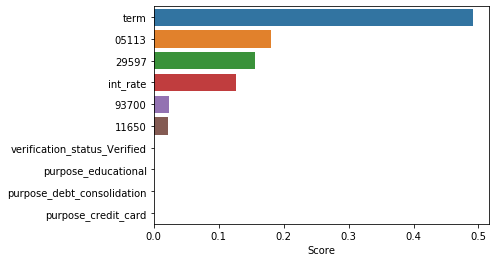

In [318]:
sns.barplot(data=score_dtree_final.sort_values(by=['Score'], ascending=False).head(10), x='Score', y=score_dtree_final.sort_values(by=['Score'], ascending=False).head(10).index)

## Export Model

In [321]:
import pickle

In [322]:
filename = 'finalized_model.sav'
pickle.dump(dtree_final, open(filename, 'wb'))

In [323]:
filename = 'x_columns.sav'
pickle.dump(X.columns, open(filename , 'wb'))

In [525]:
real_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'sub-grade', 'verification_status','application_type','initial_list_status','purpose']
len(real_columns)

19

In [468]:
filename = 'real_columns.sav'
pickle.dump(real_columns, open(filename , 'wb'))